In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
def hash_prompt(sentence):
  hash = 0
  for word in sentence:
    for c in word:
      hash = ord(c) + (hash << 2) - 3*hash
  return hash

In [ ]:
def hash_token(token):
  hash = 0
  for c in token:
    hash = ord(c) + (hash << 2) - 3*hash
  return hash

In [ ]:
train = pd.read_csv('TransformedData/es.csv', low_memory = False)

In [ ]:
train.tail(5)

,prompt,user,countries,days,session,format,time,token_1,pos_1,morf_1,case_1,gender_1,number_1,person_1,tense_1,pronType_1,token_2,pos_2,morf_2,case_2,gender_2,number_2,person_2,tense_2,pronType_2,token_3,pos_3,morf_3,case_3,gender_3,number_3,person_3,tense_3,pronType_3,token_4,pos_4,morf_4,case_4,gender_4,number_4,person_4,tense_4,pronType_4,token_5,pos_5,morf_5,case_5,gender_5,number_5,person_5,tense_5,pronType_5,token_6,pos_6,morf_6,case_6,gender_6,number_6,person_6,tense_6,pronType_6,token_7,pos_7,morf_7,case_7,gender_7,number_7,person_7,tense_7,pronType_7,token_8,pos_8,morf_8,case_8,gender_8,number_8,person_8,tense_8,pronType_8,token_9,pos_9,morf_9,case_9,gender_9,number_9,person_9,tense_9,pronType_9,token_10,pos_10,morf_10,case_10,gender_10,number_10,person_10,tense_10,pronType_10,token_11,pos_11,morf_11,case_11,gender_11,number_11,person_11,tense_11,pronType_11,token_12,pos_12,morf_12,case_12,gender_12,number_12,person_12,tense_12,pronType_12,acc_sum
52787,,nCtV8omH,AU|PE,6.499,practice,listen,6.0,Los,DET,det,NaN,Masc,Plur,NaN,NaN,Art,niños,NOUN,nsubj,NaN,Masc,Plur,NaN,NaN,NaN,leen,VERB,ROOT,NaN,NaN,Plur,3.0,Pres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52788,,nCtV8omH,AU|PE,6.501,practice,listen,3.0,La,DET,det,NaN,Fem,Sing,NaN,NaN,Art,carne,NOUN,ROOT,NaN,Fem,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
52789,You eat cheese.,nCtV8omH,AU|PE,6.501,practice,reverse_tap,12.0,Tú,PROPN,nsubj,NaN,NaN,NaN,NaN,NaN,NaN,comes,VERB,ROOT,NaN,NaN,Plur,NaN,NaN,NaN,queso,NOUN,dobj,NaN,Masc,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
52790,,nCtV8omH,AU|PE,6.501,practice,listen,3.0,La,DET,det,NaN,Fem,Sing,NaN,NaN,Art,comida,NOUN,ROOT,NaN,Fem,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
52791,Our cat,nCtV8omH,AU|PE,6.504,practice,reverse_translate,13.0,Nuestro,DET,det,NaN,Masc,Plur,NaN,NaN,Prs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
train = train.replace({np.nan: '0'})
train['acc_sum'] = train['acc_sum'].astype(int)

#hashing
train['prompt'] = train['prompt'].apply(hash_prompt)
train['user'] = train['user'].apply(hash_token)
train['countries'] = train['countries'].apply(hash_token)
train['session'] = train['session'].apply(hash_token)
train['format'] = train['format'].apply(hash_token)

train['token_1'] = train['token_1'].apply(hash_token)
train['token_2'] = train['token_2'].apply(hash_token)
train['token_3'] = train['token_3'].apply(hash_token)
train['token_4'] = train['token_4'].apply(hash_token)
train['token_5'] = train['token_5'].apply(hash_token)
train['token_6'] = train['token_6'].apply(hash_token)
train['token_7'] = train['token_7'].apply(hash_token)
train['token_8'] = train['token_8'].apply(hash_token)
train['token_9'] = train['token_9'].apply(hash_token)
train['token_10'] = train['token_10'].apply(hash_token)
train['token_11'] = train['token_11'].apply(hash_token)
train['token_12'] = train['token_12'].apply(hash_token)

train['morf_1'] = train['morf_1'].apply(hash_token)
train['morf_2'] = train['morf_2'].apply(hash_token)
train['morf_3'] = train['morf_3'].apply(hash_token)
train['morf_4'] = train['morf_4'].apply(hash_token)
train['morf_5'] = train['morf_5'].apply(hash_token)
train['morf_6'] = train['morf_6'].apply(hash_token)
train['morf_7'] = train['morf_7'].apply(hash_token)
train['morf_8'] = train['morf_8'].apply(hash_token)
train['morf_9'] = train['morf_9'].apply(hash_token)
train['morf_10'] = train['morf_10'].apply(hash_token)
train['morf_11'] = train['morf_11'].apply(hash_token)
train['morf_12'] = train['morf_12'].apply(hash_token)

train['pos_1'] = train['pos_1'].apply(hash_token)
train['pos_2'] = train['pos_2'].apply(hash_token)
train['pos_3'] = train['pos_3'].apply(hash_token)
train['pos_4'] = train['pos_4'].apply(hash_token)
train['pos_5'] = train['pos_5'].apply(hash_token)
train['pos_6'] = train['pos_6'].apply(hash_token)
train['pos_7'] = train['pos_7'].apply(hash_token)
train['pos_8'] = train['pos_8'].apply(hash_token)
train['pos_9'] = train['pos_9'].apply(hash_token)
train['pos_10'] = train['pos_10'].apply(hash_token)
train['pos_11'] = train['pos_11'].apply(hash_token)
train['pos_12'] = train['pos_12'].apply(hash_token)

train['case_1'] = train['case_1'].apply(hash_token)
train['case_2'] = train['case_2'].apply(hash_token)
train['case_3'] = train['case_3'].apply(hash_token)
train['case_4'] = train['case_4'].apply(hash_token)
train['case_5'] = train['case_5'].apply(hash_token)
train['case_6'] = train['case_6'].apply(hash_token)
train['case_7'] = train['case_7'].apply(hash_token)
train['case_8'] = train['case_8'].apply(hash_token)
train['case_9'] = train['case_9'].apply(hash_token)
train['case_10'] = train['case_10'].apply(hash_token)
train['case_11'] = train['case_11'].apply(hash_token)
train['case_12'] = train['case_12'].apply(hash_token)

train['gender_1'] = train['gender_1'].apply(hash_token)
train['gender_2'] = train['gender_2'].apply(hash_token)
train['gender_3'] = train['gender_3'].apply(hash_token)
train['gender_4'] = train['gender_4'].apply(hash_token)
train['gender_5'] = train['gender_5'].apply(hash_token)
train['gender_6'] = train['gender_6'].apply(hash_token)
train['gender_7'] = train['gender_7'].apply(hash_token)
train['gender_8'] = train['gender_8'].apply(hash_token)
train['gender_9'] = train['gender_9'].apply(hash_token)
train['gender_10'] = train['gender_10'].apply(hash_token)
train['gender_11'] = train['gender_11'].apply(hash_token)
train['gender_12'] = train['gender_12'].apply(hash_token)

train['tense_1'] = train['tense_1'].apply(hash_token)
train['tense_2'] = train['tense_2'].apply(hash_token)
train['tense_3'] = train['tense_3'].apply(hash_token)
train['tense_4'] = train['tense_4'].apply(hash_token)
train['tense_5'] = train['tense_5'].apply(hash_token)
train['tense_6'] = train['tense_6'].apply(hash_token)
train['tense_7'] = train['tense_7'].apply(hash_token)
train['tense_8'] = train['tense_8'].apply(hash_token)
train['tense_9'] = train['tense_9'].apply(hash_token)
train['tense_10'] = train['tense_10'].apply(hash_token)
train['tense_11'] = train['tense_11'].apply(hash_token)
train['tense_12'] = train['tense_12'].apply(hash_token)

train['pronType_1'] = train['pronType_1'].apply(hash_token)
train['pronType_2'] = train['pronType_2'].apply(hash_token)
train['pronType_3'] = train['pronType_3'].apply(hash_token)
train['pronType_4'] = train['pronType_4'].apply(hash_token)
train['pronType_5'] = train['pronType_5'].apply(hash_token)
train['pronType_6'] = train['pronType_6'].apply(hash_token)
train['pronType_7'] = train['pronType_7'].apply(hash_token)
train['pronType_8'] = train['pronType_8'].apply(hash_token)
train['pronType_9'] = train['pronType_9'].apply(hash_token)
train['pronType_10'] = train['pronType_10'].apply(hash_token)
train['pronType_11'] = train['pronType_11'].apply(hash_token)
train['pronType_12'] = train['pronType_12'].apply(hash_token)

train['number_1'] = train['number_1'].apply(hash_token)
train['number_2'] = train['number_2'].apply(hash_token)
train['number_3'] = train['number_3'].apply(hash_token)
train['number_4'] = train['number_4'].apply(hash_token)
train['number_5'] = train['number_5'].apply(hash_token)
train['number_6'] = train['number_6'].apply(hash_token)
train['number_7'] = train['number_7'].apply(hash_token)
train['number_8'] = train['number_8'].apply(hash_token)
train['number_9'] = train['number_9'].apply(hash_token)
train['number_10'] = train['number_10'].apply(hash_token)
train['number_11'] = train['number_11'].apply(hash_token)
train['number_12'] = train['number_12'].apply(hash_token)

train.head(5)

,prompt,user,countries,days,session,format,time,token_1,pos_1,morf_1,case_1,gender_1,number_1,person_1,tense_1,pronType_1,token_2,pos_2,morf_2,case_2,gender_2,number_2,person_2,tense_2,pronType_2,token_3,pos_3,morf_3,case_3,gender_3,number_3,person_3,tense_3,pronType_3,token_4,pos_4,morf_4,case_4,gender_4,number_4,person_4,tense_4,pronType_4,token_5,pos_5,morf_5,case_5,gender_5,number_5,person_5,tense_5,pronType_5,token_6,pos_6,morf_6,case_6,gender_6,number_6,person_6,tense_6,pronType_6,token_7,pos_7,morf_7,case_7,gender_7,number_7,person_7,tense_7,pronType_7,token_8,pos_8,morf_8,case_8,gender_8,number_8,person_8,tense_8,pronType_8,token_9,pos_9,morf_9,case_9,gender_9,number_9,person_9,tense_9,pronType_9,token_10,pos_10,morf_10,case_10,gender_10,number_10,person_10,tense_10,pronType_10,token_11,pos_11,morf_11,case_11,gender_11,number_11,person_11,tense_11,pronType_11,token_12,pos_12,morf_12,case_12,gender_12,number_12,person_12,tense_12,pronType_12,acc_sum
0,32,543,132,0.009,660,655,9.0,177,221,317,48,388,401,0,48,295,319,320,324,48,388,401,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,0
1,32,543,132,0.009,660,655,8.0,177,221,317,48,388,401,0,48,295,414,320,324,48,280,401,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,0
2,831,543,132,0.009,660,1833,8.0,177,221,317,48,388,401,0,48,295,319,320,324,48,388,401,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,0
3,32,543,132,0.012,660,655,9.0,529,303,324,48,48,419,1.0,408,48,763,320,415,48,280,419,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,0
4,802,543,132,0.012,660,1833,11.0,871,319,546,48,388,419,0,48,48,733,303,324,48,48,419,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,0


In [ ]:
from sklearn.preprocessing import minmax_scale

In [ ]:
scaler = minmax_scale

In [ ]:
scaled = train
cols_to_scale = ['days', 'time', 'person_1', 'person_2', 'person_3', 'person_4', 'person_5', 'person_6', 'person_7',
                 'person_8', 'person_9', 'person_10', 'person_11', 'person_12'
                 ]
scaled[cols_to_scale] = scaler(train[cols_to_scale])
scaled.head(5)

,prompt,user,countries,days,session,format,time,token_1,pos_1,morf_1,case_1,gender_1,number_1,person_1,tense_1,pronType_1,token_2,pos_2,morf_2,case_2,gender_2,number_2,person_2,tense_2,pronType_2,token_3,pos_3,morf_3,case_3,gender_3,number_3,person_3,tense_3,pronType_3,token_4,pos_4,morf_4,case_4,gender_4,number_4,person_4,tense_4,pronType_4,token_5,pos_5,morf_5,case_5,gender_5,number_5,person_5,tense_5,pronType_5,token_6,pos_6,morf_6,case_6,gender_6,number_6,person_6,tense_6,pronType_6,token_7,pos_7,morf_7,case_7,gender_7,number_7,person_7,tense_7,pronType_7,token_8,pos_8,morf_8,case_8,gender_8,number_8,person_8,tense_8,pronType_8,token_9,pos_9,morf_9,case_9,gender_9,number_9,person_9,tense_9,pronType_9,token_10,pos_10,morf_10,case_10,gender_10,number_10,person_10,tense_10,pronType_10,token_11,pos_11,morf_11,case_11,gender_11,number_11,person_11,tense_11,pronType_11,token_12,pos_12,morf_12,case_12,gender_12,number_12,person_12,tense_12,pronType_12,acc_sum
0,32,543,132,0.000329,660,655,0.000097,177,221,317,48,388,401,0.000000,48,295,319,320,324,48,388,401,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,0
1,32,543,132,0.000329,660,655,0.000086,177,221,317,48,388,401,0.000000,48,295,414,320,324,48,280,401,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,0
2,831,543,132,0.000329,660,1833,0.000086,177,221,317,48,388,401,0.000000,48,295,319,320,324,48,388,401,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,0
3,32,543,132,0.000453,660,655,0.000097,529,303,324,48,48,419,0.333333,408,48,763,320,415,48,280,419,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,0
4,802,543,132,0.000453,660,1833,0.000118,871,319,546,48,388,419,0.000000,48,48,733,303,324,48,48,419,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,0


Resampling

In [ ]:
X = train.drop('acc_sum', axis = 1)
y = train['acc_sum'].astype(int)

In [ ]:
print('Total values:', train.shape[0])
print('Classes:')
print(y.value_counts())
y.value_counts(normalize = True) *100

Total values: 52792
Classes:
acc_sum
0    38037
1    14755
Name: count, dtype: int64


acc_sum
0    72.050689
1    27.949311
Name: proportion, dtype: float64

In [ ]:
X_scaled = scaled.drop('acc_sum', axis = 1)
y_scaled = scaled['acc_sum'].astype(int)

In [ ]:
print('Total values:', scaled.shape[0])
print('Classes:')
print(y_scaled.value_counts())
y_scaled.value_counts(normalize = True) *100

Total values: 52792
Classes:
acc_sum
0    38037
1    14755
Name: count, dtype: int64


acc_sum
0    72.050689
1    27.949311
Name: proportion, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size = 0.20,
                                                    random_state = 24)

In [ ]:
print('Total values:', X_train.shape[0])
print('Classes:')
print(y_train.value_counts())
y_train.value_counts(normalize = True) *100

Total values: 42233
Classes:
acc_sum
0    30375
1    11858
Name: count, dtype: int64


acc_sum
0    71.92243
1    28.07757
Name: proportion, dtype: float64

<Axes: title={'center': 'Spanish-English training dataset'}, xlabel='acc_sum'>

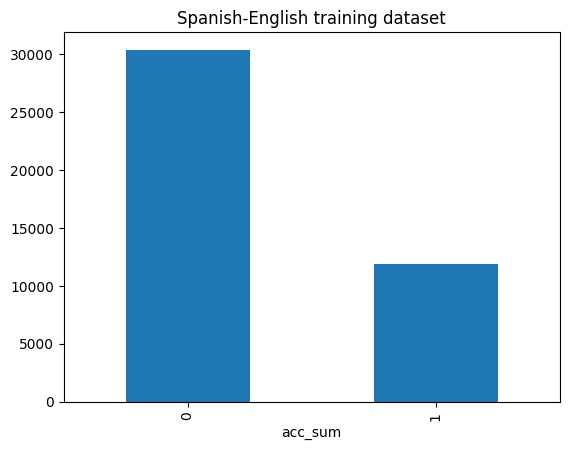

In [ ]:
y_train.value_counts().plot(kind = 'bar', title = 'Spanish-English training dataset')

In [ ]:
print('Total values:', X_test.shape[0])
print('Classes:')
y_test.value_counts()

Total values: 10559
Classes:


acc_sum
0    7662
1    2897
Name: count, dtype: int64

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scaled,
                                                    y_scaled, test_size = 0.20,
                                                    random_state = 24)

In [ ]:
print('Total values:', Xs_train.shape[0])
print('Classes:')
ys_train.value_counts()

Total values: 42233
Classes:


acc_sum
0    30375
1    11858
Name: count, dtype: int64

In [ ]:
print('Total values:', Xs_test.shape[0])
print('Classes:')
ys_test.value_counts()

Total values: 10559
Classes:


acc_sum
0    7662
1    2897
Name: count, dtype: int64

In [ ]:
!pip install imblearn

Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(sampling_strategy = "not majority")

In [ ]:
X_over, y_over = ros.fit_resample(X_train, y_train)

In [ ]:
print('Total values:', X_over.shape[0])
print('Classes:')
y_over.value_counts()

Total values: 60750
Classes:


acc_sum
0    30375
1    30375
Name: count, dtype: int64

<Axes: title={'center': 'Oversampled training es-en dataset'}, xlabel='acc_sum'>

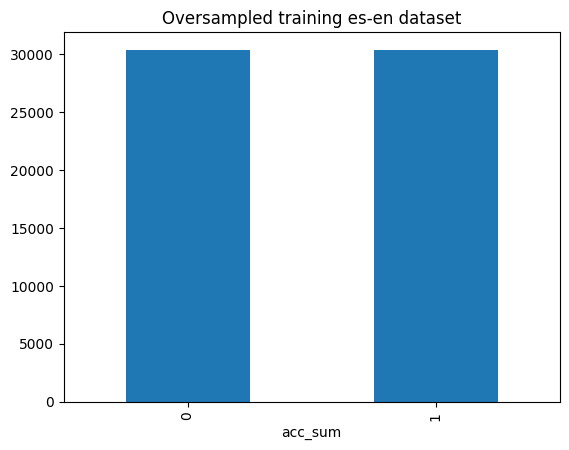

In [ ]:
y_over.value_counts().plot(kind = 'bar', title = 'Oversampled training es-en dataset')

In [ ]:
Xs_over, ys_over = ros.fit_resample(Xs_train, ys_train)
print('Total values:', Xs_over.shape[0])
print('Classes:')
ys_over.value_counts()

Total values: 60750
Classes:


acc_sum
0    30375
1    30375
Name: count, dtype: int64

Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(sampling_strategy = "not minority")

In [ ]:
X_under, y_under = rus.fit_resample(X_train, y_train)

In [ ]:
print('Total values:', X_under.shape[0])
print('Classes:')
y_under.value_counts()

Total values: 23716
Classes:


acc_sum
0    11858
1    11858
Name: count, dtype: int64

<Axes: title={'center': 'Undersampled training es-en dataset'}, xlabel='acc_sum'>

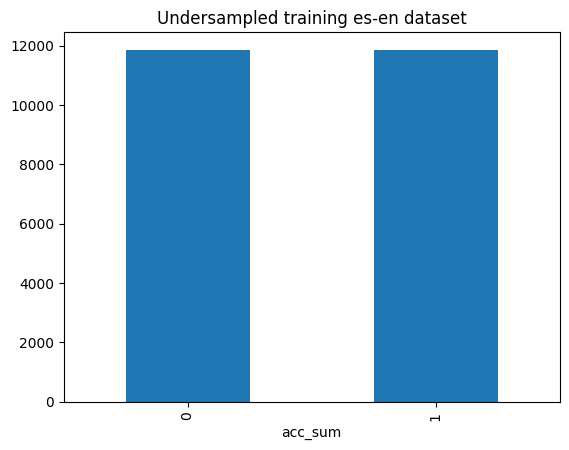

In [ ]:
y_under.value_counts().plot(kind = 'bar', title = 'Undersampled training es-en dataset')

In [ ]:
Xs_under, ys_under = rus.fit_resample(Xs_train, ys_train)
print('Total values:', Xs_under.shape[0])
print('Classes:')
ys_under.value_counts()

Total values: 23716
Classes:


acc_sum
0    11858
1    11858
Name: count, dtype: int64

Decision Tree model - oversampled dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
parameter = {
    'criterion' :['entropy', 'gini', 'log_loss'],
    'max_depth':[30, 40, 50, 60],
    'max_features':['sqrt', 'log2'],
    'min_samples_split':[10, 20, 30, 40, 50],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

model = DecisionTreeClassifier()
from sklearn.model_selection import RandomizedSearchCV
cv = RandomizedSearchCV(model, param_distributions = parameter, n_iter = 50)

In [ ]:
cv.fit(X_over, y_over)
cv.score(X_over, y_over)
cv.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'gini'}

In [ ]:
dt_o = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = 30,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 10,
                                 min_samples_split = 10
                                 )

In [ ]:
dt_o.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=10)

In [ ]:
y_o_dt = dt_o.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_o_dt))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74      7662
           1       0.41      0.60      0.49      2897

    accuracy                           0.65     10559
   macro avg       0.61      0.64      0.61     10559
weighted avg       0.70      0.65      0.67     10559



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
y_prob_o = dt_o.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc_score(y_test, y_prob_o)

0.686899277526946

In [ ]:
fpr_o, tpr_o, _ = roc_curve(y_test,  y_prob_o)

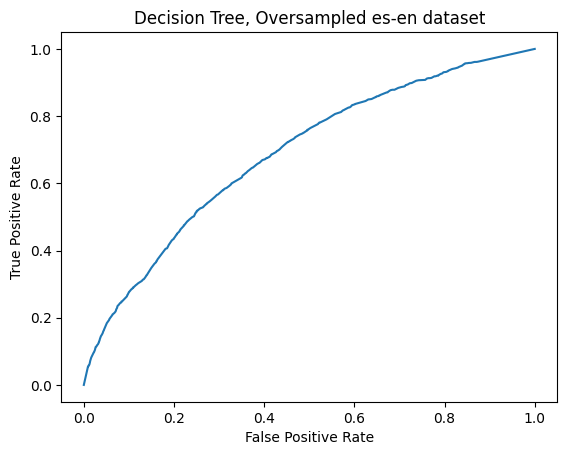

In [ ]:
plt.plot(fpr_o, tpr_o)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree, Oversampled es-en dataset')
plt.show()

In [ ]:
confusion_matrix_oversampled = confusion_matrix(y_test, y_o_dt)

In [ ]:
print(confusion_matrix_oversampled)

[[5154 2508]
 [1160 1737]]


Decision Tree - Undersampled dataset

In [ ]:
cv.fit(X_under, y_under)
cv.score(X_under, y_under)
cv.best_params_

{'min_samples_split': 50,
 'min_samples_leaf': 30,
 'max_features': 'sqrt',
 'max_depth': 60,
 'criterion': 'log_loss'}

In [ ]:
dt_u = DecisionTreeClassifier(criterion = 'log_loss',
                                 max_depth = 60,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 30,
                                 min_samples_split = 50
                                 )

In [ ]:
dt_u.fit(X_under, y_under)

DecisionTreeClassifier(criterion='log_loss', max_depth=60, max_features='sqrt',
                       min_samples_leaf=30, min_samples_split=50)

In [ ]:
y_u_dt = dt_u.predict(X_test)

In [ ]:
print(classification_report(y_test, y_u_dt))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71      7662
           1       0.40      0.67      0.51      2897

    accuracy                           0.64     10559
   macro avg       0.62      0.65      0.61     10559
weighted avg       0.72      0.64      0.66     10559



In [ ]:
y_prob_u = dt_u.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc_score(y_test, y_prob_u)

0.7011222421379933

In [ ]:
fpr_u, tpr_u, _ = roc_curve(y_test,  y_prob_u)

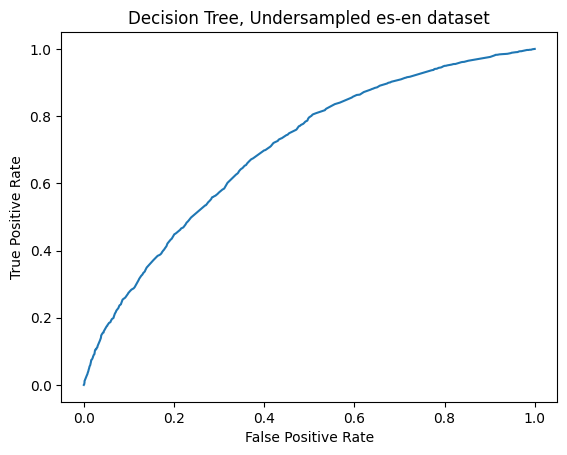

In [ ]:
plt.plot(fpr_u, tpr_u)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree, Undersampled es-en dataset')
plt.show()

In [ ]:
confusion_matrix_undersampled = confusion_matrix(y_test, y_u_dt)

In [ ]:
print(confusion_matrix_undersampled)

[[4785 2877]
 [ 943 1954]]


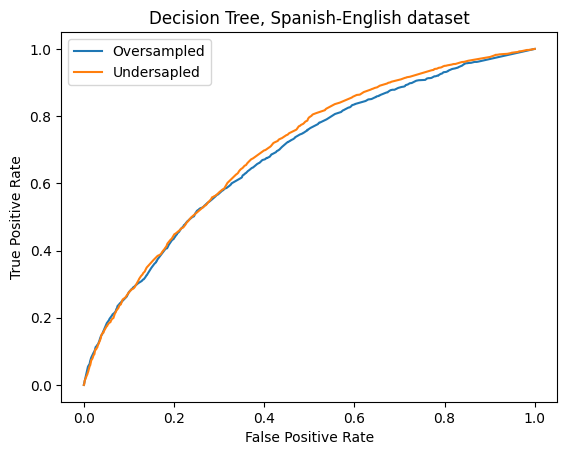

In [ ]:
plt.plot(fpr_o, tpr_o, label= "Oversampled")
plt.plot(fpr_u, tpr_u, label= "Undersapled")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree, Spanish-English dataset')
plt.show()

Gradient Boosted Decision Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
parameter = {
    'n_estimators':[10, 20, 30, 40, 50],
    'max_depth':[30, 40, 50, 60],
    'max_features':['sqrt', 'log2'],
    'min_samples_split':[10, 20, 30, 40, 50],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

model = GradientBoostingClassifier()
from sklearn.model_selection import RandomizedSearchCV
cv = RandomizedSearchCV(model, param_distributions = parameter, n_iter = 50)

In [ ]:
cv.fit(X_over, y_over)
cv.score(X_over, y_over)
cv.best_params_

{'n_estimators': 40,
 'min_samples_split': 50,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 40}

In [ ]:
gbdt_o = GradientBoostingClassifier(n_estimators = 40,
                                 max_depth = 40,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 10,
                                 min_samples_split = 50
                                 )

In [ ]:
gbdt_o.fit(X_over, y_over)

GradientBoostingClassifier(max_depth=40, max_features='sqrt',
                           min_samples_leaf=10, min_samples_split=50,
                           n_estimators=40)

In [ ]:
y_o_gbdt = gbdt_o.predict(X_test)

In [ ]:
print(classification_report(y_test, y_o_gbdt))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      7662
           1       0.51      0.59      0.55      2897

    accuracy                           0.73     10559
   macro avg       0.67      0.69      0.68     10559
weighted avg       0.75      0.73      0.74     10559



In [ ]:
y_prob_o = gbdt_o.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob_o)

0.7747501285544853

In [ ]:
fpr_o, tpr_o, _ = roc_curve(y_test,  y_prob_o)

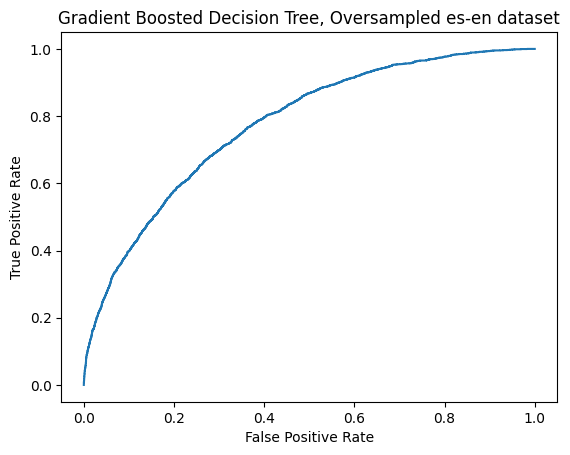

In [ ]:
plt.plot(fpr_o, tpr_o)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Gradient Boosted Decision Tree, Oversampled es-en dataset')
plt.show()

In [ ]:
confusion_matrix_oversampled = confusion_matrix(y_test, y_o_gbdt)

In [ ]:
print(confusion_matrix_oversampled)

[[6023 1639]
 [1176 1721]]


Gradient Boosted Decision Tree - Undersampled

In [ ]:
cv.fit(X_under, y_under)
cv.score(X_under, y_under)
cv.best_params_

{'n_estimators': 50,
 'min_samples_split': 50,
 'min_samples_leaf': 40,
 'max_features': 'sqrt',
 'max_depth': 30}

In [ ]:
gbdt_u = GradientBoostingClassifier(n_estimators = 50,
                                 max_depth = 30,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 40,
                                 min_samples_split = 50
                                 )

In [ ]:
gbdt_u.fit(X_under, y_under)

GradientBoostingClassifier(max_depth=30, max_features='sqrt',
                           min_samples_leaf=40, min_samples_split=50,
                           n_estimators=50)

In [ ]:
y_u_gbdt = gbdt_u.predict(X_test)

In [ ]:
print(classification_report(y_test, y_u_gbdt))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      7662
           1       0.47      0.72      0.56      2897

    accuracy                           0.70     10559
   macro avg       0.67      0.70      0.67     10559
weighted avg       0.76      0.70      0.71     10559



In [ ]:
y_prob_u = gbdt_u.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob_u)

0.7756267183209268

In [ ]:
fpr_u, tpr_u, _ = roc_curve(y_test,  y_prob_u)

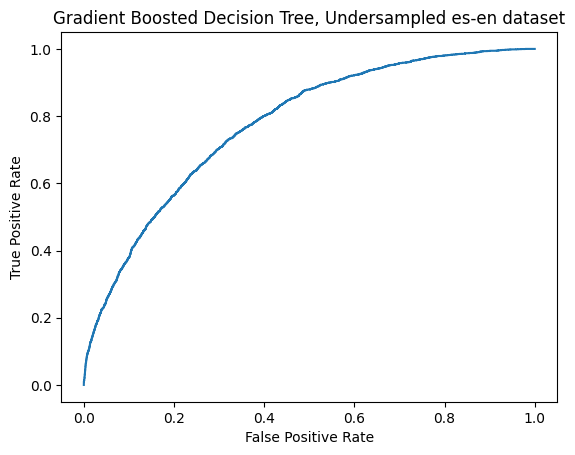

In [ ]:
plt.plot(fpr_u, tpr_u)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Gradient Boosted Decision Tree, Undersampled es-en dataset')
plt.show()

In [ ]:
confusion_matrix_undersampled = confusion_matrix(y_test, y_u_gbdt)
print(confusion_matrix_undersampled)

[[5276 2386]
 [ 818 2079]]


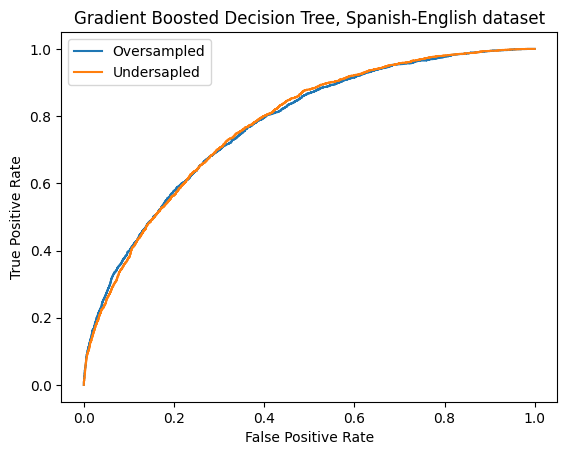

In [ ]:
plt.plot(fpr_o, tpr_o, label= "Oversampled")
plt.plot(fpr_u, tpr_u, label= "Undersapled")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Gradient Boosted Decision Tree, Spanish-English dataset')
plt.show()

Logistic Regression - oversampled

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
parameter = {
    'C':[0.01, 0.1, 1, 10, 100],
    'solver':['liblinear'],
    'max_iter':[9000],
    'penalty':['l1'],
}

model = LogisticRegression()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model, param_grid = parameter)

In [ ]:
cv.fit(Xs_over, ys_over)
cv.score(Xs_over, ys_over)
cv.best_params_

{'C': 100, 'max_iter': 9000, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
log_o = LogisticRegression(C = 100, solver = 'liblinear', penalty = 'l1', max_iter = 9000)

In [ ]:
log_o.fit(Xs_over, ys_over)

LogisticRegression(C=100, max_iter=9000, penalty='l1', solver='liblinear')

In [ ]:
y_o_log = log_o.predict(Xs_test)

In [ ]:
print(classification_report(ys_test, y_o_log))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74      7662
           1       0.42      0.60      0.49      2897

    accuracy                           0.66     10559
   macro avg       0.62      0.64      0.62     10559
weighted avg       0.71      0.66      0.68     10559



In [ ]:
y_prob_o = log_o.predict_proba(Xs_test)[:, 1]
roc_auc_score(ys_test, y_prob_o)

0.682545341867531

In [ ]:
fpr_o, tpr_o, _ = roc_curve(ys_test,  y_prob_o)

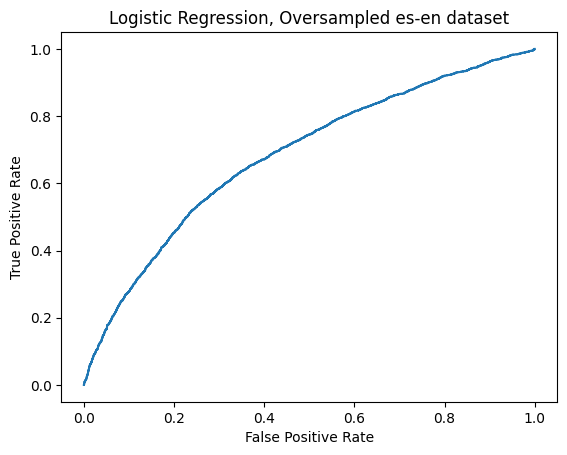

In [ ]:
plt.plot(fpr_o, tpr_o)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression, Oversampled es-en dataset')
plt.show()

In [ ]:
confusion_matrix_oversampled = confusion_matrix(ys_test, y_o_log)
print(confusion_matrix_oversampled)

[[5222 2440]
 [1149 1748]]


Logistic Regression - undersampled

In [ ]:
cv.fit(Xs_under, ys_under)
cv.score(Xs_under, ys_under)
cv.best_params_

{'C': 0.01, 'max_iter': 9000, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
log_u = LogisticRegression(C = 0.01, solver = 'liblinear', penalty = 'l1', max_iter = 9000)

In [ ]:
log_u.fit(Xs_under, ys_under)

LogisticRegression(C=0.01, max_iter=9000, penalty='l1', solver='liblinear')

In [ ]:
y_u_log = log_u.predict(Xs_test)

In [ ]:
print(classification_report(ys_test, y_u_log))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      7662
           1       0.42      0.60      0.49      2897

    accuracy                           0.66     10559
   macro avg       0.62      0.64      0.62     10559
weighted avg       0.71      0.66      0.68     10559



In [ ]:
y_prob_u = log_u.predict_proba(Xs_test)[:, 1]
roc_auc_score(ys_test, y_prob_u)

0.6824865045947586

In [ ]:
fpr_u, tpr_u, _ = roc_curve(ys_test,  y_prob_u)

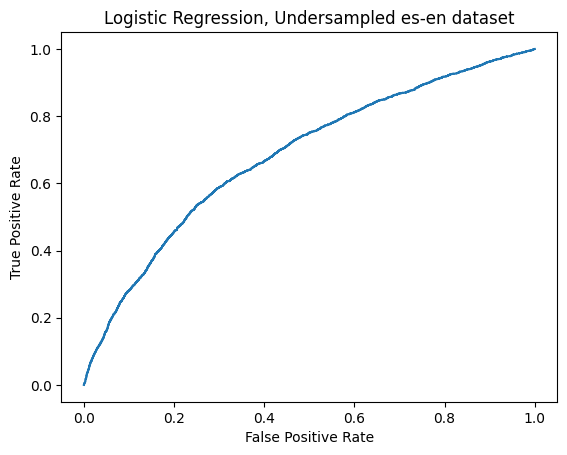

In [ ]:
plt.plot(fpr_u, tpr_u)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression, Undersampled es-en dataset')
plt.show()

In [ ]:
confusion_matrix_undersampled = confusion_matrix(ys_test, y_u_log)
print(confusion_matrix_undersampled)

[[5255 2407]
 [1156 1741]]


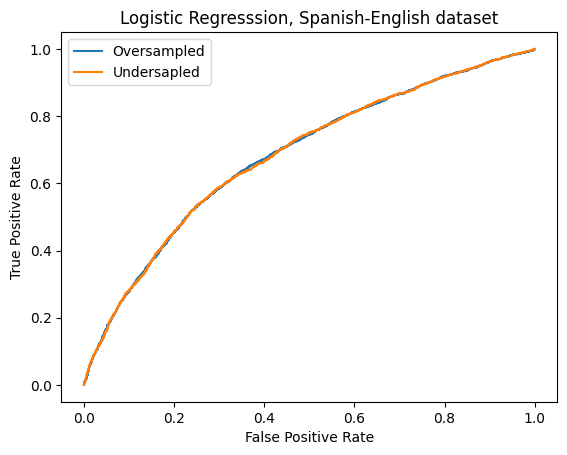

In [ ]:
plt.plot(fpr_o, tpr_o, label= "Oversampled")
plt.plot(fpr_u, tpr_u, label= "Undersapled")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regresssion, Spanish-English dataset')
plt.show()